In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

In [4]:
df=pd.read_excel("C:/Users/pcc/Downloads/EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
data = normalize.fit_transform(df.iloc[:,1:].to_numpy())
new_df=pd.DataFrame(data,columns=df.columns[1:])
new_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# HierarchicalClustering

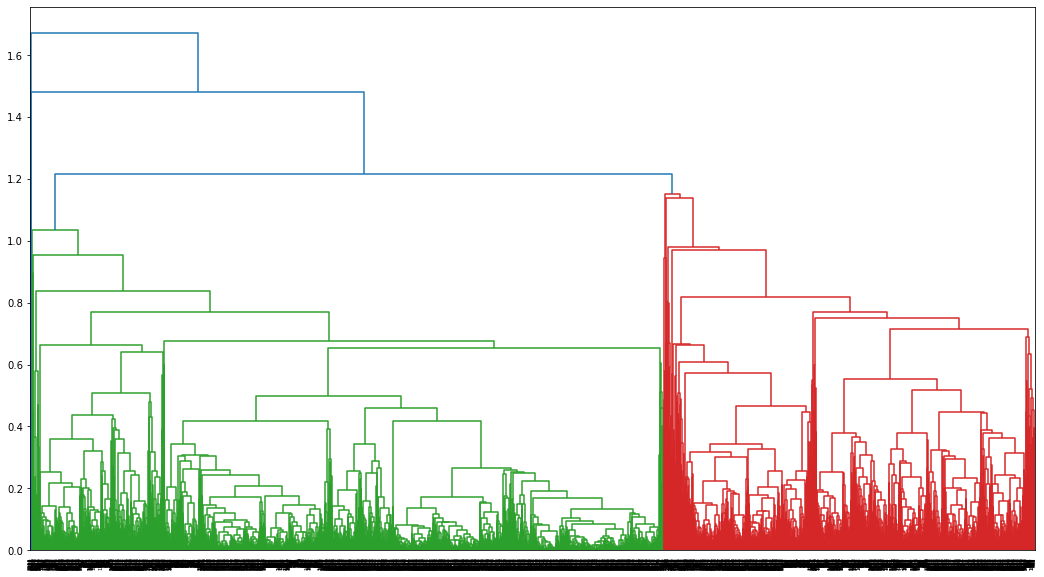

In [8]:
plt.figure(figsize=(18,10))
dendrogram=sch.dendrogram(sch.linkage(new_df,method="average"))

In [9]:
hc=AgglomerativeClustering(n_clusters=9,affinity="euclidean",linkage="average")
y=hc.fit_predict(new_df)
y

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [10]:
cluster=pd.DataFrame(y,columns=["cluster"])
new_df1=pd.concat([new_df,cluster],axis=1)
new_df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,4
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,4
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,4
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [11]:
df1=pd.concat([df,cluster],axis=1)
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


#  DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

<AxesSubplot:>

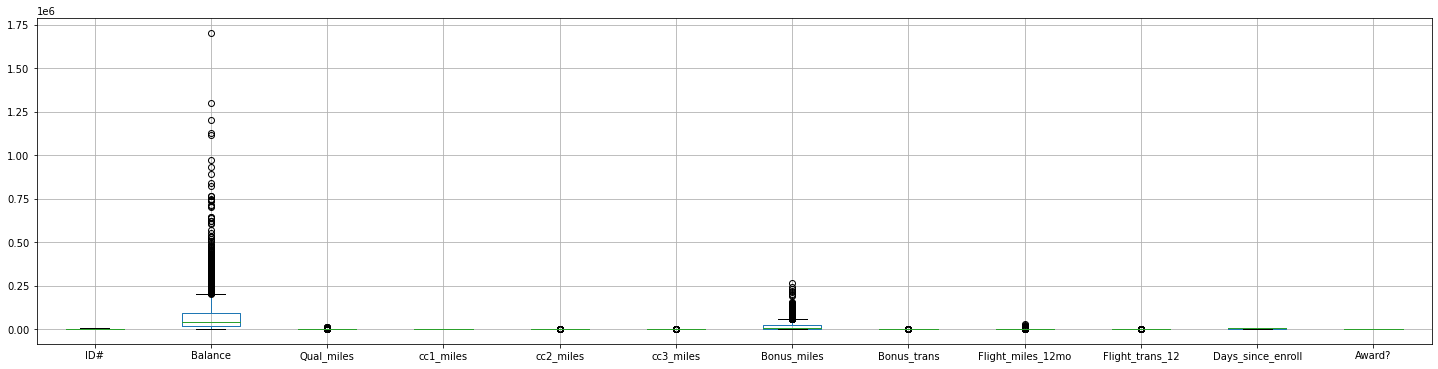

In [18]:
df.boxplot(figsize=(25,6))

In [47]:
dbscan=DBSCAN(eps=0.3,min_samples=10).fit(new_df)

In [48]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
cluster1=pd.DataFrame(dbscan.labels_,columns=["cluster"])
new_df2=pd.concat([new_df,cluster1],axis=1)
new_df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [50]:
df2=pd.concat([df,cluster1],axis=1)
df2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [51]:
from sklearn.metrics import silhouette_score
silhouette_score(new_df2.iloc[:,:],dbscan.labels_)

0.6429215027843328

In [52]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(new_df2.iloc[:,:],dbscan.labels_)

3427.9994258160227

# Kmeans Clustering

In [53]:
from sklearn.cluster import KMeans

In [54]:
wcss=[]
sil=[]
cal=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i,random_state=0).fit(new_df)
    wcss.append(kmean.inertia_)
    if i==1: 
        continue
    sil.append(silhouette_score(new_df,kmean.labels_))
    cal.append(calinski_harabasz_score(new_df,kmean.labels_))

In [55]:
wcss

[1830.793212858415,
 823.6756984125232,
 625.1684881570748,
 436.71719004195575,
 348.9433217254147,
 319.0111513821081,
 287.7295534651801,
 263.21429989139347,
 243.92574880337432,
 226.10985005073994]

In [56]:
sil

[0.535930510919477,
 0.46484529388583046,
 0.4744941579482721,
 0.4430672072796034,
 0.38865859989228385,
 0.3909601011818369,
 0.38030165896247936,
 0.3842538055607832,
 0.34523029131540034]

In [57]:
cal

[4887.1767286548775,
 3853.1023965303593,
 4250.907939313226,
 4240.307878597626,
 3784.5358980848728,
 3568.1178505371,
 3395.4991070192086,
 3244.6355154388843,
 3145.513999211974]

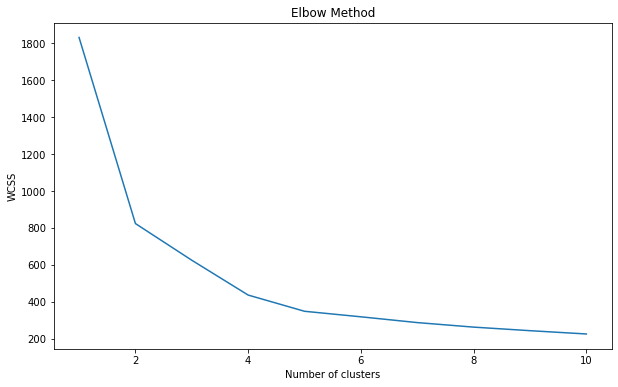

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
cluster_new=KMeans(n_clusters=6,random_state=0).fit(new_df)
cluster_new.labels_

array([0, 0, 0, ..., 1, 4, 4])

In [65]:
cluster3=pd.DataFrame(cluster_new.labels_,columns=["cluster"])
new_df3=pd.concat([new_df,cluster3],axis=1)
new_df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,4


In [66]:
df3=pd.concat([df,cluster3],axis=1)
df3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [67]:
cluster_new.cluster_centers_

array([[ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01,  1.16573418e-15],
       [ 4.11842030e-02,  1.54948971e-02,  4.32345361e-01,
         2.57731959e-03,  2.57731959e-03,  7.14976124e-02,
         1.95606569e-01,  1.47541239e-02,  2.43143357e-02,
         5.36565683e-01,  1.00000000e+00],
       [ 5.11158156e-02,  2.86306329e-02, -3.33066907e-16,
         1.84859155e-02,  8.80281690e-04,  3.02892215e-02,
         1.10362758e-01,  3.69075602e-02,  6.55726814e-02,
         5.21925955e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -4.99600361e-16],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
  

In [68]:
new_df3.groupby("cluster").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,0.029282,0.008065,0.030530,0.009793,0.000288,0.013149,0.080391,0.007912,0.013738,0.671079,0.0
1,0.041184,0.015495,0.432345,0.002577,0.002577,0.071498,0.195607,0.014754,0.024314,0.536566,1.0
2,0.051116,0.028631,0.000000,0.018486,0.000880,0.030289,0.110363,0.036908,0.065573,0.521926,1.0
3,0.069389,0.006590,0.646036,0.000809,0.005663,0.119022,0.200384,0.007272,0.011846,0.532620,0.0
4,0.019414,0.008444,0.017684,0.008236,0.001696,0.012305,0.071784,0.006907,0.011390,0.239981,0.0
5,0.074852,0.018354,0.852381,0.000000,0.010000,0.223625,0.253732,0.027660,0.049452,0.611173,1.0
